# Neural Network built on **Pytorch**

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
data=pd.read_csv('/content/powerconsumption.csv')
data=data.drop('Datetime', axis=1)

In [ ]:
x = data.drop(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis=1)
yone=data['PowerConsumption_Zone1']
X_train,X_test,y_train,y_test=train_test_split(x,yone, test_size=0.2)

In [ ]:

X_train = torch.from_numpy(np.array(X_train)).float()
X_test = torch.from_numpy(np.array(X_test)).float()
y_train = torch.from_numpy(np.array(y_train)).float().view(-1, 1)
y_test = torch.from_numpy(np.array(y_test)).float().view(-1, 1)

In [ ]:
data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x


Epoch 1/500: Training Loss: 362713729728.0, Validation Loss: 70204296.0, Training RMSE: 8330.8935546875, Validation RMSE: 8378.80078125
Epoch 6/500: Training Loss: 66991643178.0, Validation Loss: 51738592.0, Training RMSE: 7129.2412109375, Validation RMSE: 7192.9541015625
Epoch 11/500: Training Loss: 65442596754.0, Validation Loss: 50631716.0, Training RMSE: 7054.19189453125, Validation RMSE: 7115.5966796875
Epoch 16/500: Training Loss: 64010343262.0, Validation Loss: 49505364.0, Training RMSE: 6975.58935546875, Validation RMSE: 7036.0048828125
Epoch 21/500: Training Loss: 62437661746.0, Validation Loss: 49142000.0, Training RMSE: 6937.67529296875, Validation RMSE: 7010.1357421875
Epoch 26/500: Training Loss: 60742712738.0, Validation Loss: 46942844.0, Training RMSE: 6783.466796875, Validation RMSE: 6851.48486328125
Epoch 31/500: Training Loss: 58967447390.0, Validation Loss: 45576208.0, Training RMSE: 6691.55322265625, Validation RMSE: 6751.015625
Epoch 36/500: Training Loss: 57368204

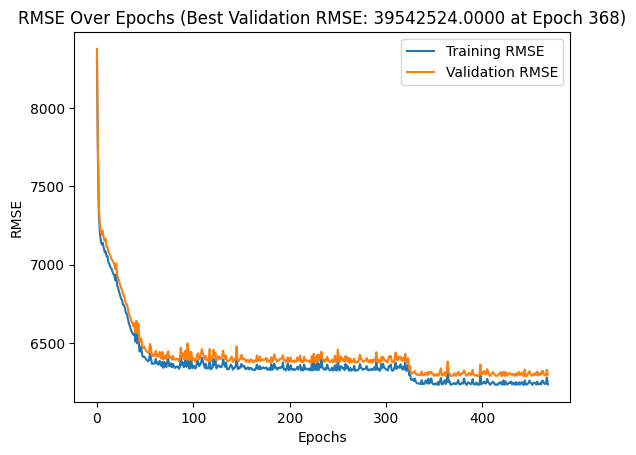

RMSE on Test Data: 6298.45263671875


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
'''
class NeuralNetwork(nn.Module):
    def _init_(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self)._init_()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
'''

def rmse(y_true, y_pred):
    return torch.sqrt(nn.functional.mse_loss(y_true, y_pred))

def linear_regression_neural_network(X_train, y_train, X_val, y_val, input_size, hidden_size, output_size, learning_rate, epochs, batch_size):
    model = NeuralNetwork(X_train.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.9)  # Learning rate scheduler

    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    val_dataset = TensorDataset(X_val, y_val)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    early_stopping_patience = 100
    best_val_loss = float('inf')
    best_epoch = 0

    train_rmse_list = []
    val_rmse_list = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        scheduler.step()

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        train_rmse = rmse(y_train, model(X_train)).item()
        val_rmse = rmse(y_val, val_outputs).item()
        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            best_model = model.state_dict()

        if epoch - best_epoch > early_stopping_patience:
            print(f'Early stopping at epoch {epoch}...')
            break

        if epoch % 5 == 0:
            print(f'Epoch {epoch + 1}/{epochs}: Training Loss: {total_loss}, Validation Loss: {val_loss.item()}, Training RMSE: {train_rmse}, Validation RMSE: {val_rmse}')

    plt.plot(train_rmse_list, label='Training RMSE')
    plt.plot(val_rmse_list, label='Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.title(f'RMSE Over Epochs (Best Validation RMSE: {best_val_loss.item():.4f} at Epoch {best_epoch + 1})')
    plt.show()

    model.load_state_dict(best_model)
    return model

# Set your own values for these hyperparameters
hidden_size = 10  # Adjust the number of neurons in the hidden layer as needed
output_size = 1  # Assuming a single output for regression

batch_size = 32
learning_rate = 0.01
epochs = 500

model = linear_regression_neural_network(X_train, y_train, X_test, y_test, X_train.shape[1], hidden_size, output_size, learning_rate, epochs, batch_size)

model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_rmse = rmse(y_test, test_outputs).item()

print(f'RMSE on Test Data: {test_rmse}')

In [ ]:
import torch

def predict_power_consumption(model, user_input):
    # Convert user input to tensor
    user_input_tensor = torch.tensor(user_input, dtype=torch.float32)


    # Make prediction using the trained model
    with torch.no_grad():
        predicted_output = model(user_input_tensor)

    # Convert the predicted output tensor to a numpy array
    predicted_output = predicted_output.numpy()

    return predicted_output


In [ ]:
a1=float(input('\nEnter the value for Temperature:'))
a2=float(input('\nEnter the value for Humidity:' ))
a3=float(input('\nEnter the value for WindSpeed:'))
a4=float(input('\nEnter the value for GeneralDiffuseFlows: '))
a5=float(input('\nEnter the value for DiffuseFlows: '))

user_input = [a1,a2,a3,a4,a5]  # User inputs as a list
predicted_output = predict_power_consumption(model, user_input)
print("\nPredicted output:", predicted_output)




Enter the value for Temperature:12.34

Enter the value for Humidity:123.334

Enter the value for WindSpeed:12.355

Enter the value for GeneralDiffuseFlows: 43.12

Enter the value for DiffuseFlows: 544.2
Predicted output: [58407.793]
